In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "ZQdPBPM1CtYOZOq5gzZ45ONGu"
consumer_secret = "kH65fX9MTldOdXoxq4lOURMDzupoBqIxUk2CqJ67VsDNLYutTC"
access_token = "943258585311694848-aV9Dp1OsIRdGOoXGZKy0SPWiCZMpwd0"
access_token_secret = "Yr81e3f9OanedDmSsskNW7yRQZOA2qgnwnPZiXgHhQH8V"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term of the various Media channels
Media_users = ("@BBC", "@CBS", "@CNN","@FoxNews", "@nytimes")

# Array to hold sentiment
Sentiment_array = []


In [3]:
# Extracting the first 100 tweets in each Media Channel
print("Beginning of extraction of the posted tweets from the media channels")

for user in Media_users:
    # Setting the tweet count as 100
    tweetcount=100
    print("Extracting tweets from %s"%user)
    
    # Extracting 5 pages of tweets
    for x in range(5):
        public_tweets=api.user_timeline(user,page=x)
        # For each tweet 
        for tweet in public_tweets:
            #Calculating the compound,positive,negative and neutral value for each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            # Store Tweet in Array
            Sentiment_array.append({"Media":user,
                                    "Tweet Text":tweet["text"],
                                    "Compound":compound,
                                    "Positive":pos,
                                    "Negative":neg,
                                    "Neutral":neu,
                                    "Date":tweet["created_at"],
                                    "Tweets Ago":tweetcount})
            #Decreasing tweet count by 1
            tweetcount-=1

print("End of Extraction of Tweets")

Beginning of extraction of the posted tweets from the media channels
Extracting tweets from @BBC
Extracting tweets from @CBS
Extracting tweets from @CNN
Extracting tweets from @FoxNews
Extracting tweets from @nytimes
End of Extraction of Tweets


In [4]:
# Creating a dataframe from the Sentiment Array
Sentiment_DF=pd.DataFrame.from_dict(Sentiment_array)
# Removing the '@' from Media column in the data frame
Sentiment_DF['Media'] = Sentiment_DF['Media'].map(lambda x: x.lstrip('@'))

# Re_arranging the order of columns before saving into CSV file
Sentiment_DF=Sentiment_DF[["Media","Date","Tweet Text","Compound","Positive","Negative","Neutral","Tweets Ago"]]
# Storing into a CSV File\
Sentiment_DF.to_csv("Output/Media_SentimentAnalysis.csv")

Sentiment_DF.head()

,Media,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,BBC,Tue Jan 02 23:03:13 +0000 2018,RT @BBCRadio4: The roots of a national treasur...,0.2960,0.155,0.000,0.845,100
1,BBC,Tue Jan 02 23:02:58 +0000 2018,RT @BBCOne: Make a date with #McMafia. Continu...,0.0000,0.000,0.000,1.000,99
2,BBC,Tue Jan 02 21:30:03 +0000 2018,Everything we thought we knew about the T-Rex ...,-0.4767,0.000,0.171,0.829,98
3,BBC,Tue Jan 02 19:00:10 +0000 2018,"More than 300 actresses, writers &amp; directo...",-0.6808,0.064,0.258,0.678,97
4,BBC,Tue Jan 02 18:34:05 +0000 2018,"Tonight, @ChrisGPackham investigates planet Ea...",0.5994,0.206,0.000,0.794,96


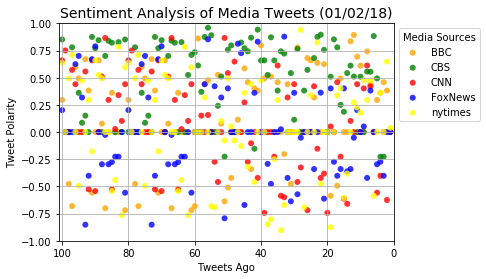

In [5]:
# Creating an array with the unique Media sources in the data frame
Media_Source=Sentiment_DF["Media"].unique()

#Plotting the graph for each media source
for media in Media_Source:
    # Creating a temporary data frame to store for only one media channel at a time
    Temp_DF=Sentiment_DF[Sentiment_DF["Media"]==media]
    plt.scatter(Temp_DF["Tweets Ago"],Temp_DF["Compound"], marker="o", linewidth=0, alpha=0.8, label=media,
                facecolors=Temp_DF.Media.map({"BBC": "orange", "CBS" : "green",  "CNN": 'red',
                                              "FoxNews":"blue","nytimes":"yellow"}))


#plt.hlines(0,0,np.arange(len(Sentiment_DF["Compound"])),alpha=1)
# Setting the legend 
plt.legend(bbox_to_anchor = (1,1),title="Media Sources")
# Setting the title,x_axis and y_axis labels
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")), fontsize=14)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
#Setting the x_axis and y_axis limits
plt.xlim(101,0)
plt.ylim(-1,1)
# Setting the grid
plt.grid(True)

# Saving the figue
plt.savefig("Output/Sentiment Analysis of Media Tweets.png",bbox_inches='tight')

plt.show()

In [6]:
# Calculating the mean for each Media channel and storing to a dataframe
Media_Compound_Means=Sentiment_DF.groupby("Media").mean()["Compound"].to_frame()
#Resetting the index 
Media_Compound_Means.reset_index(inplace=True)

Media_Compound_Means

,Media,Compound
0,BBC,0.133935
1,CBS,0.460898
2,CNN,0.062059
3,FoxNews,0.005025
4,nytimes,0.053396


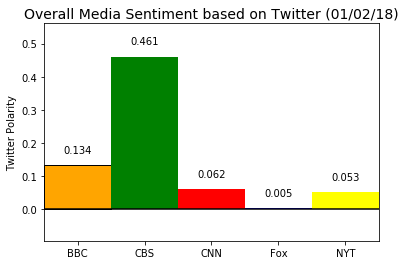

In [7]:
# Setting the x_axis and y-axis value
x_axis=Media_Compound_Means.index.values
y_axis=Media_Compound_Means["Compound"]

# Intializing the plots
fig,ax=plt.subplots()

#Setting the plot and assigning the color based on the Positive or not value
bars=ax.bar(x_axis,y_axis,align="edge",width=1,linewidth=1,
            edgecolor='black',color=["orange","green","red","blue","yellow"])

# Setting the ticks for the bar graph
tick_locations = [value+0.5 for value in range(len(x_axis))]
plt.xticks(tick_locations,["BBC","CBS","CNN","Fox","NYT"])

# Setting the text label in the bar graph
# If value is positive then put True in the Summary else place False, for changing the color based on the value
Media_Compound_Means["Positive"]=Media_Compound_Means["Compound"]>0
# Assign the height based on whether it is a  positive value
height = Media_Compound_Means.Positive.map({True: 0.03 , False: -0.03})
# Setting the value label on the each bar
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()+height[bars.index(bar)],
            round(Media_Compound_Means["Compound"][bars.index(bar)],3),ha='center', va='bottom')


# Setting the x_axis limits
ax.set_xlim(0, len(x_axis))
#Setting the y_axis limits dynamically by finding the maximum and minimum value in y-axis
ax.set_ylim(min(y_axis)-0.1, max(y_axis)+0.1)

# Setting a horizontal line at y=0
plt.hlines(0,0,len(x_axis))

# Setting the title of the graph
ax.set_title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")), fontsize=14)
# Setting the y_axis label
ax.set_ylabel("Twitter Polarity")

# Saving the graph
plt.savefig("Output/Overall_Media_Sentiment_based_on_Twitter.png",bbox_inches='tight')
plt.show()